In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [23]:
data = pd.read_csv('SMSSpamCollection',sep='\t', names = ['label','message'])
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [24]:
data.shape

(5572, 2)

In [25]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
data.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [27]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [28]:
data.dtypes

,0
label,object
message,object


In [29]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [30]:
data.columns

Index(['label', 'message'], dtype='object')

In [31]:
data.isnull().sum()

,0
label,0
message,0


In [32]:
import re
df = pd.DataFrame(data)

In [33]:
#Remove Punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

In [34]:
df['cleaned_message'] = df['message'].apply(remove_punctuation)

In [35]:
df[['cleaned_message','label']]

,cleaned_message,label
0,Go until jurong point crazy Available only in ...,ham
1,Ok lar Joking wif u oni,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor U c already then say,ham
4,Nah I dont think he goes to usf he lives aroun...,ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will ü b going to esplanade fr home,ham
5569,Pity was in mood for that Soany other suggest...,ham
5570,The guy did some bitching but I acted like id ...,ham


In [36]:
data['label'] = data['label'].map({'ham':0, 'spam':1})
data

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(data['message'])
x_array = x.toarray()
feature_names = vectorizer.get_feature_names_out()

In [38]:
#Create a DataFrame
x_df = pd.DataFrame(x_array, columns=vectorizer.get_feature_names_out())
print("Vocabulary Mapping:",vectorizer.vocabulary_)

Vocabulary Mapping: {'jurong': 4248, 'point': 5779, 'crazy': 2282, 'available': 1284, 'bugis': 1719, 'great': 3555, 'world': 8285, 'la': 4374, 'buffet': 1717, 'cine': 2007, 'got': 3515, 'amore': 1064, 'wat': 8083, 'ok': 5377, 'lar': 4410, 'joking': 4216, 'wif': 8191, 'oni': 5403, 'free': 3280, 'entry': 2889, 'wkly': 8243, 'comp': 2123, 'win': 8203, 'fa': 3018, 'cup': 2341, 'final': 3135, 'tkts': 7569, '21st': 412, '2005': 403, 'text': 7437, '87121': 794, 'receive': 6158, 'question': 6052, 'std': 7077, 'txt': 7754, 'rate': 6104, 'apply': 1141, '08452810075over18': 77, 'dun': 2751, 'say': 6496, 'early': 2770, 'hor': 3840, 'nah': 5124, 'don': 2663, 'think': 7492, 'goes': 3479, 'usf': 7892, 'lives': 4562, 'freemsg': 3287, 'hey': 3757, 'darling': 2398, 'week': 8129, 'word': 8276, 'like': 4512, 'fun': 3342, 'tb': 7372, 'xxx': 8350, 'chgs': 1961, 'send': 6584, '50': 616, 'rcv': 6116, 'brother': 1689, 'speak': 6959, 'treat': 7687, 'aids': 997, 'patent': 5582, 'request': 6267, 'melle': 4862, 'o

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_df,data['label'],test_size=0.25,random_state=42)

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [41]:
navie_bayes = MultinomialNB()
navie_bayes.fit(x_train,y_train)

MultinomialNB()

In [42]:
y_pred = navie_bayes.predict(x_test)

In [43]:
confusion_matrix(y_test,y_pred)

array([[1189,   18],
       [   9,  177]])

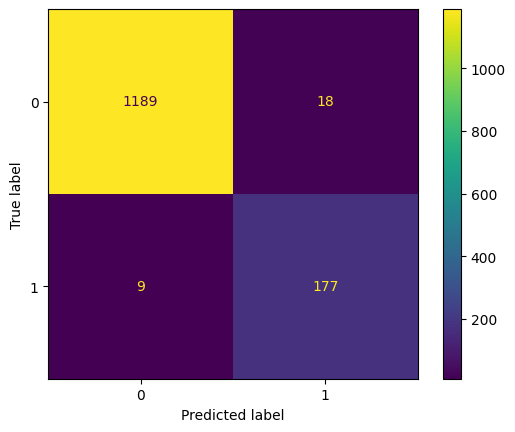

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [45]:
accuracy_score(y_test,y_pred)

0.9806173725771715

In [48]:
from sklearn.model_selection import cross_val_score
multinomial_accuracy = cross_val_score(navie_bayes,x_df,data['label'],cv=5)
multinomial_accuracy

array([0.98116592, 0.98026906, 0.97396768, 0.97935368, 0.98204668])

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(x_df, data['label'])

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]})

In [50]:
Message = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]


In [51]:
Message_vectorized = vectorizer.transform(Message)
label_predict =  navie_bayes.predict(Message_vectorized)
label_map = {0: 'ham', 1: 'spam'}
predicted_label = label_map[label_predict[0]]
print("Predicted Label:", predicted_label)

Predicted Label: spam


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
